# 02-2 데이터 전처리

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight)) # tuple로 전달

In [ ]:
print(len(fish_data))

49


In [ ]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# train_test_split()함수: 데이터를 섞어서 랜덤으로 분할(train, test => 비율은 75% : 25%),random_state: random seed
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) 

In [ ]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- test_target 데이터를 살펴보면 데이터의 비율이 3.3:1인 것을 알 수 있다. 
- 기존 데이터의 수가 35개 : 14개로 2.5:1인 것과 비교하면 샘플링 편향(sampling bias) 문제가 존재하는 것을 알 수 있다.
- 이러한 샘플링 편향 문제를 해결하기 위해 train_test_split() 함수는 stratify 매개변수를 제공하며 이 값을 조정하여 샘플링 편향 문제를 해결할 수 있다.

In [ ]:
# stratify 매개변수 지정
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42) 

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


- stratify 매개변수를 지정하여 데이터를 분리한 결과 test_target에 0이 1개 더 추가된 것을 확인할 수 있다.
- 즉, 2.5:1 비율로 test_target 데이터가 생성된 것을 확인할 수 있다.

In [ ]:
# KNN 모델을 이용한 예측
knn = KNeighborsClassifier() # 모델 생성
knn.fit(train_input, train_target) # 모델 학습
knn.score(test_input, test_target) # 모델 성능 확인

1.0

In [ ]:
print(knn.predict([[25, 150]])) # 1.0 아닌 0.0이 출력된 것을 확인할 수 있음 -> 잘못된 결과 why?

[0.]


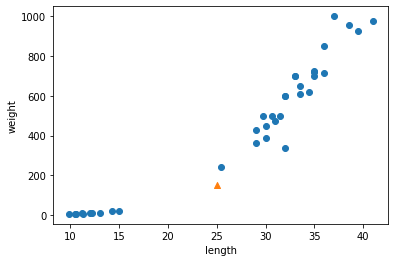

In [ ]:
# 데이터 산점도 그래프를 통해 데이터 확인
plt.scatter(train_input[:, 0], train_input[:, 1])  # x축(생선 길이), y축(생선 무게)
plt.scatter(25, 150, marker='^')  # 예측하고자 했던 데이터 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- KNN 모델은 주어진 샘플 주변에 다수인 클래스를 예측으로 사용
- sklearn KNeighborsClassifier 클래스는 주어진 샘플에서 가자 가까운 이웃을 찾아주는 `kneighbor()` 함수 제공
- default는 주어진 샘플 중 가장 가까운 5개를 찾음

In [ ]:
distances, indexes = knn.kneighbors([[25, 150]])

In [ ]:
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


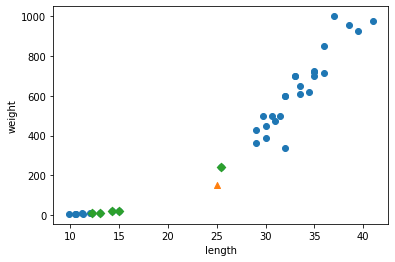

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])  # x축(생선 길이), y축(생선 무게)
plt.scatter(25, 150, marker='^')  # 예측하고자 했던 데이터 표시
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 주어진 샘플과 가장 가까운 이웃 데이터 5개 값 확인
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
# distances 값 확인
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- 샘플 데이터와 거리가 가장 가까운 데이터는 거리가 92
- 그런데 샘플 데이터와 가장 가까운 빙어 데이터와의 거리는 130 -> 그래프 상에서는 92보다 몇 배는 거리가 멀어보이는데 값은 130으로 나타남
- 문제의 원인 -> x축 범위와 y축 범위 기준이 같지 않아서 나타나는 현상
- 즉, 생선 길이가 조금만 달라져도(y축) 데이터 간 거리가 훨씬 더 멀어지는 현상 발생
- 문제 해결을 위해 x축과 y축 범위 기준을 동일하게 맞춰준다.
  - `plt.xlim()`, `plt.ylim()`
- `거리를 기반으로 예측을 수행하는 모델(알고리즘)의 경우 데이터 표현 기준을 동일하게 맞춰주어야` 한다.
- 특성(feature) 값 스케일(scale)을 맞춰주는 작업을 `데이터 전처리(Data Preprocessing)`라고 한다.

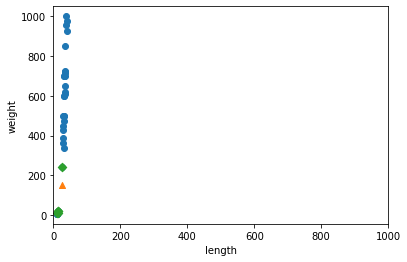

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])  # x축(생선 길이), y축(생선 무게)
plt.scatter(25, 150, marker='^')  # 예측하고자 했던 데이터 표시
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()